#### Regression Scenario

##### Forecasting Economic Indicators (Unemployment rate)

The task involved building machine learning models to forecast the unemployment rate using a dataset that contains global economic data. The data contains columns such as Year, Country, Unemployment rate, GDP Market Prices, Total Reserve, and Consumer Price Index.

Initially, two models were built: Linear Regression and Random Forest Regression. The evaluation metrics, Mean Squared Error and R^2 Score, were used to select the best model. The Random Forest Regression model was selected because it had better evaluation metrics than Linear Regression.

After selecting the best model, the unemployment rate was predicted for the next 5 years using the best model. The predicted values were visualized along with the actual unemployment rate values. The trends for other variables such as GDP Market Prices, Total Reserve, and Consumer Price Index were also visualized.

Lastly, a correlation matrix was created to show the correlation between all variables in the dataset. This was done to identify which variables have a strong or weak correlation with unemployment rate. The visualizations and correlation matrix helped in understanding the relationships between variables in the dataset and in building a model to forecast unemployment rate.



In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the data from CSV file
data = pd.read_csv('Global economic data - main.csv')

data.head()

,Year,Country,Unemployment,GDP Market Prices,Total Reserve,Consumer Price Index
0,1990,Australia,6.943297,323674.0,16369.89,66.241230
1,1990,Brazil,NaN,NaN,9973.00,0.000971
2,1990,Canada,8.150000,596021.0,17894.17,67.658640
3,1990,Switzerland,0.501328,259188.1,32804.88,75.615760
4,1990,Chile,NaN,NaN,21276.73,30.008330


In [ ]:
#Checking for the null values
print(data.isnull().sum())

Year                      0
Country                   0
Unemployment            210
GDP Market Prices        84
Total Reserve            12
Consumer Price Index     12
dtype: int64


Removing all the null values for data accuracy

In [ ]:
data = data.dropna()

print(data.isnull().sum())

Year                    0
Country                 0
Unemployment            0
GDP Market Prices       0
Total Reserve           0
Consumer Price Index    0
dtype: int64


Visualising the trends of unemployment from 1990 to 2018

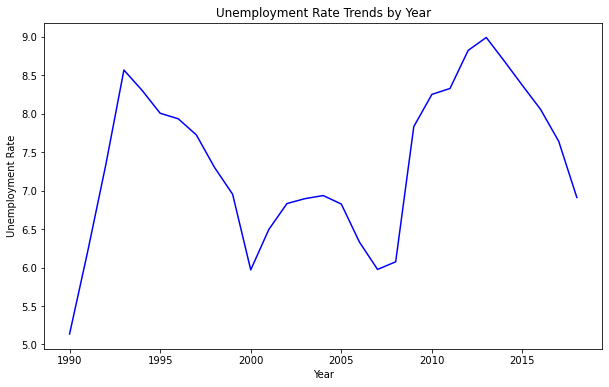

In [ ]:
import matplotlib.pyplot as plt

# Group the data by year and calculate the mean unemployment rate for each year
unemp_by_year = data.groupby('Year')['Unemployment'].mean()

# Create a line plot of the unemployment rate trends by year
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(unemp_by_year.index, unemp_by_year.values, color='b')
ax.set_xlabel('Year')
ax.set_ylabel('Unemployment Rate')
ax.set_title('Unemployment Rate Trends by Year')
plt.show()

The data was grouped by year and calculates the mean unemployment rate for each year using the groupby method in pandas.

Now I want to visualise the trends of all selected economic variables in the data to see the patterns it forms over the years.

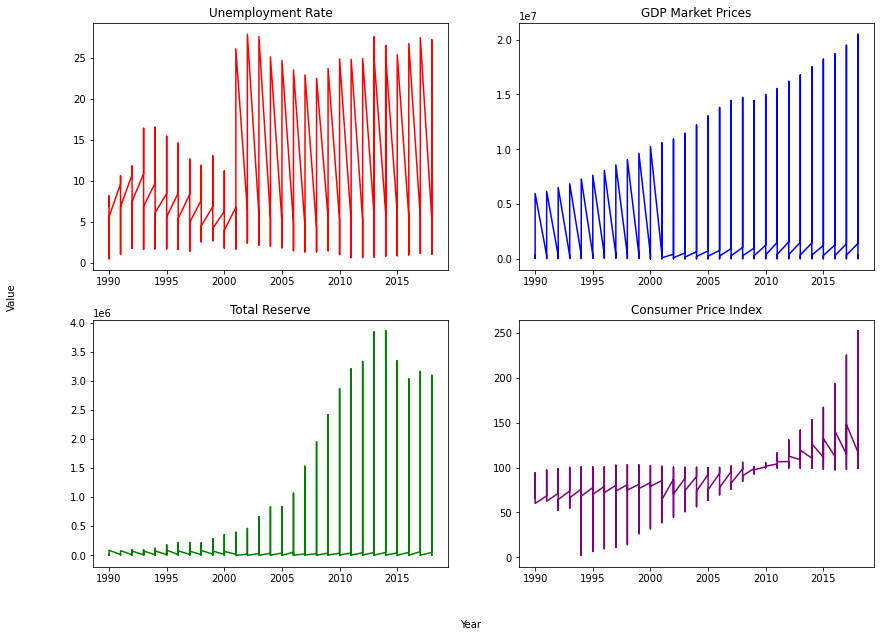

In [ ]:
# Create a figure with a larger size
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Unemployment rate plot
axs[0, 0].plot(data['Year'], data['Unemployment'], color='red')
axs[0, 0].set_title('Unemployment Rate')

# GDP Market Prices plot
axs[0, 1].plot(data['Year'], data['GDP Market Prices'], color='blue')
axs[0, 1].set_title('GDP Market Prices')

# Total Reserve plot
axs[1, 0].plot(data['Year'], data['Total Reserve'], color='green')
axs[1, 0].set_title('Total Reserve')

# Consumer Price Index plot
axs[1, 1].plot(data['Year'], data['Consumer Price Index'], color='purple')
axs[1, 1].set_title('Consumer Price Index')

# Add a common x-axis label and y-axis label for the entire figure
fig.text(0.5, 0.04, 'Year', ha='center')
fig.text(0.04, 0.5, 'Value', va='center', rotation='vertical')

plt.show()

It is also important to investigate the correlation between each indicators using heatmap.

This will be done by firsly remove the Year column, as it is not among the economic indicators

In [ ]:
#Removing the year column
data.drop(['Year'],axis=1, inplace=True)

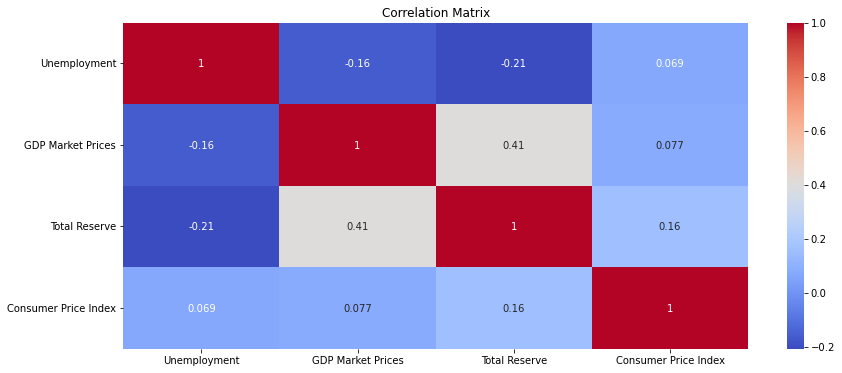

In [ ]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(14, 6))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()


The heatmap shows the correlation coefficients between all pairs of variables in the data i.e unemployment rate, GDP Market Prices, Total Reserve, Consumer Price Index. The color of each square in the heatmap indicates the strength and direction of the correlation, while the numeric value in each square represents the correlation coefficient. A positive correlation coefficient indicates a positive relationship between the two variables, while a negative correlation coefficient indicates a negative relationship. The closer the absolute value of the coefficient is to 1, the stronger the correlation.

### Model Development

The data will be divided into training (80%) and testing(20%). The target variable is the unemployment while the imput variables are the other variables.

Linear regression and Random forest models will be developed and compare their evaluation metrics to provide the model with the best evaluation

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data[['Year', 'GDP Market Prices', 'Total Reserve', 'Consumer Price Index']],
    data['Unemployment'], test_size=0.2, random_state=42)

In [ ]:
# Fit a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr.predict(X_test)

# Calculate evaluation metrics for linear regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [ ]:
# Fit a random forest regression model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Calculate evaluation metrics for random forest regression
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [ ]:
# Compare the evaluation metrics for both models
print('Linear Regression:')
print('Mean Squared Error:', mse_lr)
print('R^2 Score:', r2_lr)
print('Random Forest Regression:')
print('Mean Squared Error:', mse_rf)
print('R^2 Score:', r2_rf)

Linear Regression:
Mean Squared Error: 11.151758584300426
R^2 Score: 0.024005876195192566
Random Forest Regression:
Mean Squared Error: 3.152483295008931
R^2 Score: 0.7240968634621363


This comparsm is not intuitive enough, therefore I will visualise it to see the difference graphically

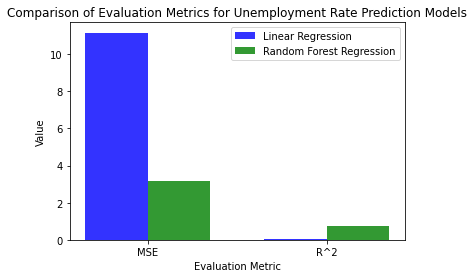

In [ ]:
import numpy as np

# Set the bar width
bar_width = 0.35

# Define the index values for the x-axis labels
index = np.arange(len(['MSE', 'R^2']))

# Create a bar plot of the evaluation metrics for the two models
fig, ax = plt.subplots()
opacity = 0.8

rects1 = ax.bar(index, [mse_lr, r2_lr], bar_width,
                alpha=opacity, color='b',
                label='Linear Regression')

rects2 = ax.bar(index + bar_width, [mse_rf, r2_rf], bar_width,
                alpha=opacity, color='g',
                label='Random Forest Regression')

# Add labels and legends
ax.set_xlabel('Evaluation Metric')
ax.set_ylabel('Value')
ax.set_title('Comparison of Evaluation Metrics for Unemployment Rate Prediction Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('MSE', 'R^2'))
ax.legend()

# Display the plot
plt.show()


The visualization shows a bar plot with the mean squared error and R^2 score for each model. The blue bars represent the linear regression model and the green bars represent the random forest regression model. It displays the relative performance of each model for each metric.

The best performing model is the model with the highest R^2 score and lowest MSE score, hence the Random Forest Regression performs better and will be used to make forecasts for the next years.

In [ ]:
# Use the model with the best evaluation metric to predict the unemployment rate
if r2_rf > r2_lr:
    best_model = rf
else:
    best_model = lr

# Predict the unemployment rate for a new set of input features
new_data = pd.DataFrame({'Year': [2022], 'GDP Market Prices': [1000000],
                         'Total Reserve': [500000], 'Consumer Price Index': [2.5]})
predicted_unemployment_rate = best_model.predict(new_data)

print('Predicted Unemployment Rate:', predicted_unemployment_rate)

Predicted Unemployment Rate: [6.29825124]


Having developed a model to make predictions based on the other variables. The intention here is to then assume values for other variables and see the trends for unemployment for the next years.

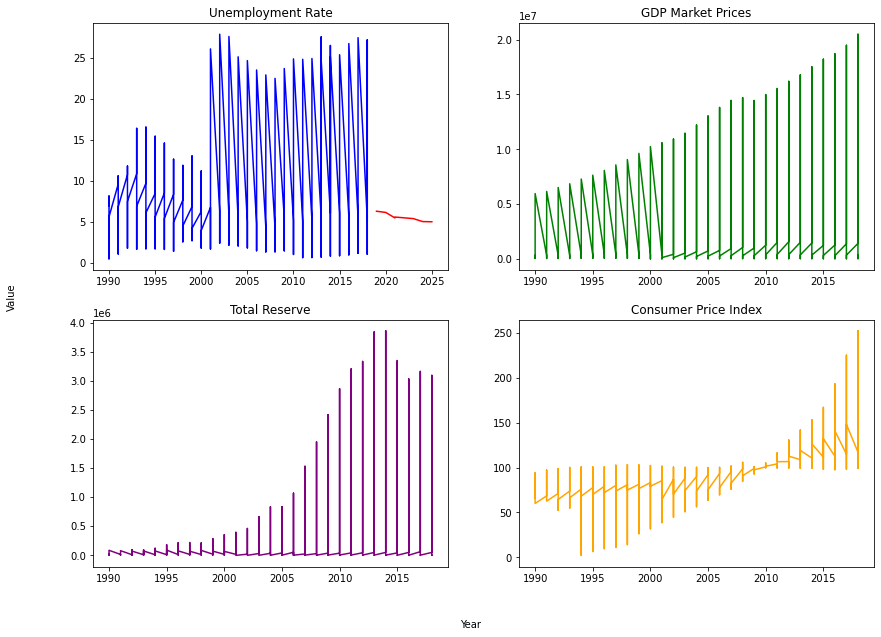

In [ ]:
# Create a figure with a larger size
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Unemployment rate plot
axs[0, 0].plot(data['Year'], data['Unemployment'], color='blue')
axs[0, 0].set_title('Unemployment Rate')

# GDP Market Prices plot
axs[0, 1].plot(data['Year'], data['GDP Market Prices'], color='green')
axs[0, 1].set_title('GDP Market Prices')

# Total Reserve plot
axs[1, 0].plot(data['Year'], data['Total Reserve'], color='purple')
axs[1, 0].set_title('Total Reserve')

# Consumer Price Index plot
axs[1, 1].plot(data['Year'], data['Consumer Price Index'], color='orange')
axs[1, 1].set_title('Consumer Price Index')

# Add a common x-axis label and y-axis label for the entire figure
fig.text(0.5, 0.04, 'Year', ha='center')
fig.text(0.04, 0.5, 'Value', va='center', rotation='vertical')

# Use the model with the best evaluation metric to predict the unemployment rate
if r2_rf > r2_lr:
    best_model = rf
else:
    best_model = lr

# Predict the unemployment rate for the next 5 years
new_data = pd.DataFrame({'Year': [2019, 2020, 2021, 2021, 2023, 2024, 2025],
                         'GDP Market Prices': [1000000, 1100000, 1200000, 1300000, 1400000,1500000,1600000],
                         'Total Reserve': [500000, 550000, 600000, 650000, 700000,7500000,800000],
                         'Consumer Price Index': [2.5, 2.7, 2.9, 3.1, 3.3, 3.5, 3.7]})
predicted_unemployment_rate = best_model.predict(new_data)

# Add the predicted unemployment rate to the unemployment rate plot
axs[0, 0].plot([2019, 2020, 2021, 2021, 2023, 2024, 2025], predicted_unemployment_rate, color='red')

plt.show()


This visualization shows the trends in all the selected global economic indicators/variables in the data including Unemployment rate, GDP Market Prices, Total Reserve, and Consumer Price Index. In addition, the chart shows the predicted unemployment rate over the next seven years from 2019 to 2025 using the random forest regression model prediction. For the unemployment rate chart, the actual value is colored blue while the predicted value is colored red.